<a href="https://colab.research.google.com/github/AlejandraMatajira/Mi-repositorio-/blob/main/violaciones_de_trafico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nombres:
- Maria Alejandra Matajira Gaitan
- Natalia Rojas Otero
- Laura Catalina Vargas Támara
- Carlos Torres Mesa

# Proyecto Grupal

### Instalación de librerias

In [ ]:
import psycopg2 as ps
import pandas as pd

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sqlalchemy import create_engine

In [ ]:
import seaborn as sns

In [ ]:
import re
import io
from unicodedata import normalize

### Lectura de la base de datos

In [ ]:
df = pd.read_csv('Traffic_Violations.csv', nrows=10000, sep=',')

In [ ]:
df.head(3)

,SeqID,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,...,Charge,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation
0,52282e8c-f2e1-4bb5-8509-2d5e4f8da8ca,05/01/2023,23:11:00,MCP,"3rd District, Silver Spring",OPERATING UNREGISTERED MOTOR VEHICLE ON HIGHWAY,BRIGGS CHANEY RD @ COLUMIBA PIKE,0.000000,0.000000,No,...,13-401(b1),Transportation Article,False,WHITE,M,GAITHERSBURG,MD,MD,A - Marked Patrol,"(0.0, 0.0)"
1,9be35886-e00c-49c2-8f27-2f6307696a17,11/25/2023,00:20:00,MCP,"6th District, Gaithersburg / Montgomery Village",FAILURE TO DISPLAY REGISTRATION CARD UPON DEMA...,GEORGIA AVE / WEISMAN RD,39.052962,-77.051304,No,...,13-409(b),Transportation Article,False,HISPANIC,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.0529625, -77.0513041666667)"
2,9be35886-e00c-49c2-8f27-2f6307696a17,11/25/2023,00:20:00,MCP,"6th District, Gaithersburg / Montgomery Village",DISPLAYING EXPIRED REGISTRATION PLATE ISSUED B...,GEORGIA AVE / WEISMAN RD,39.052962,-77.051304,No,...,13-411(f),Transportation Article,False,HISPANIC,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.0529625, -77.0513041666667)"


### Limpieza e imputación de datos

Primero se realizara una revisión de las columnas con valores nulos con el fin de conocer si es necesario imputar datos o eliminar la columna de acuerdo con el objetivo a resolver para esta base de datos.

In [ ]:
columnas_con_nulos = {}
for col in df.columns:
    num_nulos = df[col].isnull().sum()
    if num_nulos != 0:
        columnas_con_nulos[col] = num_nulos

for columna, num_nulos in columnas_con_nulos.items():
    print(f"'{columna}' tiene {num_nulos} valores nulos.")



'Search Conducted' tiene 3510 valores nulos.
'Search Disposition' tiene 9606 valores nulos.
'Search Outcome' tiene 3511 valores nulos.
'Search Reason' tiene 9606 valores nulos.
'Search Reason For Stop' tiene 3510 valores nulos.
'Search Type' tiene 9606 valores nulos.
'Search Arrest Reason' tiene 9702 valores nulos.
'Year' tiene 8 valores nulos.
'Color' tiene 68 valores nulos.
'Article' tiene 327 valores nulos.
'Driver City' tiene 6 valores nulos.


<Axes: >

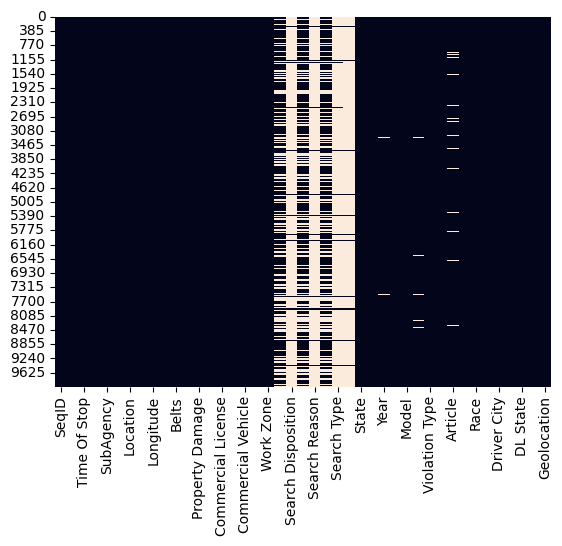

In [ ]:
sns.heatmap(df.isnull(), cbar=False)

In [ ]:
columnas_null= ['Search Conducted', 'Search Disposition', 'Search Outcome',
                'Search Reason', 'Search Reason For Stop', 'Search Type',
                'Search Arrest Reason','Year', 'Color', 'Article', 'Driver City'  ]

df[columnas_null].head(6)

,Search Conducted,Search Disposition,Search Outcome,Search Reason,Search Reason For Stop,Search Type,Search Arrest Reason,Year,Color,Article,Driver City
0,No,NaN,Citation,NaN,17-107(a1),NaN,NaN,2007.0,BLACK,Transportation Article,GAITHERSBURG
1,No,NaN,Citation,NaN,13-411(f),NaN,NaN,2013.0,RED,Transportation Article,SILVER SPRING
2,No,NaN,Citation,NaN,13-411(f),NaN,NaN,2013.0,RED,Transportation Article,SILVER SPRING
3,Yes,Property Only,Arrest,Incident to Arrest,20-103(b),Both,Stop,2004.0,SILVER,Transportation Article,SILVER SPRING
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022.0,BLACK,Transportation Article,GAITHERSBURG
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022.0,BLACK,Transportation Article,GAITHERSBURG


Conjuntamente se ha tomado la decisión de eliminar las columnas que contienen más de un 80% de datos nulos ya que no es posible imputar datos al azar.

In [ ]:
def eliminar_nulos(df,umbral=0.8, total_filas=10000):
    columnas_a_eliminar = []
    for columna in columnas_con_nulos:
        nulos_en_columna = df[columna].isnull().sum()
        porcentaje_nulos = nulos_en_columna / total_filas
        if porcentaje_nulos > umbral:
            columnas_a_eliminar.append(columna)

    df_limpio = df.copy()
    df_limpio.drop(columnas_a_eliminar, axis=1, inplace=True)

    return df_limpio

# Llamando a la función y asignando el resultado a df_limpio
df_limpio = eliminar_nulos(df)



In [ ]:
df_limpio.head(4)

,SeqID,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,...,Charge,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation
0,52282e8c-f2e1-4bb5-8509-2d5e4f8da8ca,05/01/2023,23:11:00,MCP,"3rd District, Silver Spring",OPERATING UNREGISTERED MOTOR VEHICLE ON HIGHWAY,BRIGGS CHANEY RD @ COLUMIBA PIKE,0.000000,0.000000,No,...,13-401(b1),Transportation Article,False,WHITE,M,GAITHERSBURG,MD,MD,A - Marked Patrol,"(0.0, 0.0)"
1,9be35886-e00c-49c2-8f27-2f6307696a17,11/25/2023,00:20:00,MCP,"6th District, Gaithersburg / Montgomery Village",FAILURE TO DISPLAY REGISTRATION CARD UPON DEMA...,GEORGIA AVE / WEISMAN RD,39.052962,-77.051304,No,...,13-409(b),Transportation Article,False,HISPANIC,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.0529625, -77.0513041666667)"
2,9be35886-e00c-49c2-8f27-2f6307696a17,11/25/2023,00:20:00,MCP,"6th District, Gaithersburg / Montgomery Village",DISPLAYING EXPIRED REGISTRATION PLATE ISSUED B...,GEORGIA AVE / WEISMAN RD,39.052962,-77.051304,No,...,13-411(f),Transportation Article,False,HISPANIC,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.0529625, -77.0513041666667)"
3,4d37fa99-0df3-4a56-9ba6-692bce894a34,11/26/2023,09:16:00,MCP,"4th District, Wheaton",DRIVING VEHICLE WHILE UNDER THE INFLUENCE OF A...,3803 WELLER RD,39.058378,-77.049652,No,...,21-902(a1i),Transportation Article,False,HISPANIC,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.0583783333333, -77.0496516666667)"


In [ ]:
df_limpio['Search Reason For Stop'].fillna(df_limpio['Search Reason For Stop'].mode()[0], inplace=True)
df_limpio['Year'].fillna(df_limpio['Year'].mode()[0], inplace=True)
df_limpio['Color'].fillna(df_limpio['Color'].mode()[0], inplace=True)
df_limpio['Driver City'].fillna(df_limpio['Driver City'].mode()[0], inplace=True)

print(df_limpio[['Search Reason For Stop', 'Year', 'Color', 'Driver City']].isnull().sum())

Search Reason For Stop    0
Year                      0
Color                     0
Driver City               0
dtype: int64


C:\Users\USER\AppData\Local\Temp\ipykernel_23724\4068258161.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_limpio['Search Reason For Stop'].fillna(df_limpio['Search Reason For Stop'].mode()[0], inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_23724\4068258161.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we 

<Axes: >

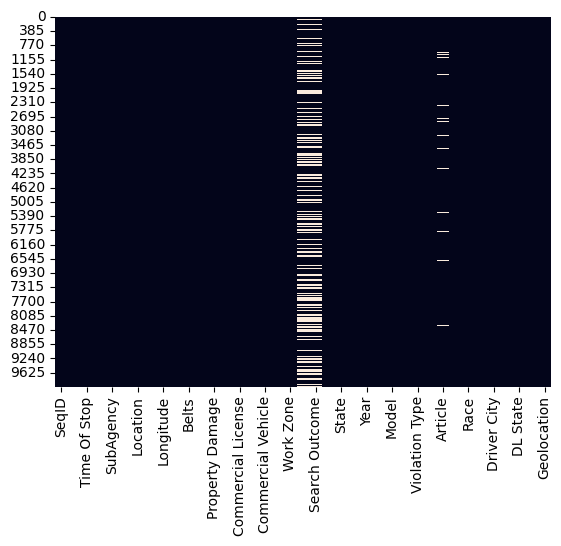

In [ ]:
sns.heatmap(df_limpio.isnull(), cbar=False)

In [ ]:
columnas_con_nulos = {}
for col in df_limpio.columns:
    num_nulos = df_limpio[col].isnull().sum()
    if num_nulos != 0:
        columnas_con_nulos[col] = num_nulos

for columna, num_nulos in columnas_con_nulos.items():
    print(f"'{columna}' tiene {num_nulos} valores nulos en df_limpio.")

'Search Conducted' tiene 3510 valores nulos en df_limpio.
'Search Outcome' tiene 3511 valores nulos en df_limpio.
'Article' tiene 327 valores nulos en df_limpio.


In [ ]:
vacias= ['Search Conducted', 'Search Outcome','Search Reason For Stop','Year','Color','Article', 'Driver City' ]

df[vacias].head(6)

,Search Conducted,Search Outcome,Search Reason For Stop,Year,Color,Article,Driver City
0,No,Citation,17-107(a1),2007.0,BLACK,Transportation Article,GAITHERSBURG
1,No,Citation,13-411(f),2013.0,RED,Transportation Article,SILVER SPRING
2,No,Citation,13-411(f),2013.0,RED,Transportation Article,SILVER SPRING
3,Yes,Arrest,20-103(b),2004.0,SILVER,Transportation Article,SILVER SPRING
4,NaN,NaN,NaN,2022.0,BLACK,Transportation Article,GAITHERSBURG
5,NaN,NaN,NaN,2022.0,BLACK,Transportation Article,GAITHERSBURG


Ahora se realizará una revisión de algunas columnas con el fin de saber si contienen información relevante es decir si los 10000 datos son iguales significa qeu no hay variacion en esta columna

In [ ]:
def analizar_variabilidad_columnas(df):
    for columna in df.columns:
        valores_unicos = df[columna].nunique()
        if valores_unicos == 1:
            print(f"La columna '{columna}' contiene un solo valor.")

df_unvalor = analizar_variabilidad_columnas(df_limpio)

La columna 'Agency' contiene un solo valor.
La columna 'HAZMAT' contiene un solo valor.
La columna 'Commercial Vehicle' contiene un solo valor.


In [ ]:
tabla_f_agen = pd.crosstab(index=df_limpio['Agency'], columns='count')
print(tabla_f_agen)

col_0   count
Agency       
MCP     10000


In [ ]:
tabla_f_hazmat = pd.crosstab(index=df_limpio['HAZMAT'], columns='count')
print(tabla_f_hazmat)

col_0   count
HAZMAT       
No      10000


In [ ]:
tabla_f_comercial = pd.crosstab(index=df_limpio['Commercial Vehicle'], columns='count')
print(tabla_f_comercial)

col_0               count
Commercial Vehicle       
No                  10000


Se elimina la columna agency ya que esta dice en que agencia fue procesada la violación de trafico, siendo procesadas todas por MCP, asi mismo HAZMAT abreviación utilizada para materiales peligrosos indica que no se encontrarón estos materiales.

In [ ]:
columnas_a_eliminar = ['Agency', 'HAZMAT']

df_limpio.drop(columnas_a_eliminar, axis=1, inplace=True)

In [ ]:
df_limpio

,SeqID,Date Of Stop,Time Of Stop,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,...,Charge,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation
0,52282e8c-f2e1-4bb5-8509-2d5e4f8da8ca,05/01/2023,23:11:00,"3rd District, Silver Spring",OPERATING UNREGISTERED MOTOR VEHICLE ON HIGHWAY,BRIGGS CHANEY RD @ COLUMIBA PIKE,0.000000,0.000000,No,No,...,13-401(b1),Transportation Article,False,WHITE,M,GAITHERSBURG,MD,MD,A - Marked Patrol,"(0.0, 0.0)"
1,9be35886-e00c-49c2-8f27-2f6307696a17,11/25/2023,00:20:00,"6th District, Gaithersburg / Montgomery Village",FAILURE TO DISPLAY REGISTRATION CARD UPON DEMA...,GEORGIA AVE / WEISMAN RD,39.052962,-77.051304,No,No,...,13-409(b),Transportation Article,False,HISPANIC,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.0529625, -77.0513041666667)"
2,9be35886-e00c-49c2-8f27-2f6307696a17,11/25/2023,00:20:00,"6th District, Gaithersburg / Montgomery Village",DISPLAYING EXPIRED REGISTRATION PLATE ISSUED B...,GEORGIA AVE / WEISMAN RD,39.052962,-77.051304,No,No,...,13-411(f),Transportation Article,False,HISPANIC,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.0529625, -77.0513041666667)"
3,4d37fa99-0df3-4a56-9ba6-692bce894a34,11/26/2023,09:16:00,"4th District, Wheaton",DRIVING VEHICLE WHILE UNDER THE INFLUENCE OF A...,3803 WELLER RD,39.058378,-77.049652,No,No,...,21-902(a1i),Transportation Article,False,HISPANIC,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.0583783333333, -77.0496516666667)"
4,3a723e9a-5dc0-4bc3-9bd9-4555d6ce0e49,11/25/2023,05:45:00,"4th District, Wheaton",RECKLESS DRIVING VEHICLE IN WANTON AND WILLFUL...,OLNEY LAYTONSVILLE RD @ FIELDCREST RD,0.000000,0.000000,No,No,...,21-901.1(a),Transportation Article,False,WHITE,M,GAITHERSBURG,MD,MD,A - Marked Patrol,"(0.0, 0.0)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,79177997-5812-4f10-95c1-775bbba39f94,07/31/2024,17:39:00,"6th District, Gaithersburg / Montgomery Village",DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC...,RING RD @ REEDIE (ENTRANCE TO MALL),0.000000,0.000000,No,No,...,21-201(a1),Transportation Article,False,BLACK,F,SILVER SPRING,MD,MD,A - Marked Patrol,"(0.0, 0.0)"
9996,bdfc1e48-5faf-49a5-b40c-2d6389a8653f,07/31/2024,08:38:00,"1st District, Rockville",EXCEEDING THE POSTED SPEED LIMIT OF 40 MPH,28 @ ALDERWOOD,39.111812,-77.239740,No,No,...,21-801.1,Transportation Article,False,HISPANIC,M,WASHINGTON,DC,DC,Q - Marked Laser,"(39.1118116666667, -77.23974)"
9997,82a5f3d0-f063-4612-9559-3eae9c4b7f32,07/31/2024,08:50:00,"1st District, Rockville",EXCEEDING THE POSTED SPEED LIMIT OF 40 MPH,28 @ ALDERWOOD,39.102987,-77.224670,No,No,...,21-801.1,Transportation Article,False,WHITE,F,GAITHERSBURG,MD,MD,Q - Marked Laser,"(39.1029866666667, -77.22467)"
9998,cff82265-e6bb-4c89-9943-c579eafc95a0,07/31/2024,09:04:00,"1st District, Rockville",EXCEEDING THE POSTED SPEED LIMIT OF 40 MPH,28 @ ALDERWOOD,39.109523,-77.237398,No,No,...,21-801.1,Transportation Article,False,WHITE,M,SILVER SPRING,MD,MD,Q - Marked Laser,"(39.1095233333333, -77.2373983333333)"


### Analisis exploratorio

In [ ]:
print(df_limpio.columns)


Index(['SeqID', 'Date Of Stop', 'Time Of Stop', 'SubAgency', 'Description',
       'Location', 'Latitude', 'Longitude', 'Accident', 'Belts',
       'Personal Injury', 'Property Damage', 'Fatal', 'Commercial License',
       'Commercial Vehicle', 'Alcohol', 'Work Zone', 'Search Conducted',
       'Search Outcome', 'Search Reason For Stop', 'State', 'VehicleType',
       'Year', 'Make', 'Model', 'Color', 'Violation Type', 'Charge', 'Article',
       'Contributed To Accident', 'Race', 'Gender', 'Driver City',
       'Driver State', 'DL State', 'Arrest Type', 'Geolocation'],
      dtype='object')


El siguiente codigo permite ver el contenido de las variables ocultas por estar en la mitad del dataframe en la impresión (...)

In [ ]:
conocer= ['Personal Injury', 'Property Damage', 'Fatal', 'Commercial License',
          'Commercial Vehicle', 'Alcohol', 'Work Zone', 'Search Conducted',
       'Search Outcome', 'Search Reason For Stop', 'State', 'VehicleType',
       'Year', 'Make', 'Model', 'Color', 'Violation Type' ]

df[conocer].head(6)

,Personal Injury,Property Damage,Fatal,Commercial License,Commercial Vehicle,Alcohol,Work Zone,Search Conducted,Search Outcome,Search Reason For Stop,State,VehicleType,Year,Make,Model,Color,Violation Type
0,No,No,No,No,No,No,No,No,Citation,17-107(a1),MD,02 - Automobile,2007.0,CHEV,CRUZ,BLACK,Citation
1,No,No,No,No,No,No,No,No,Citation,13-411(f),MD,02 - Automobile,2013.0,TOYOTA,COROLLA,RED,Citation
2,No,No,No,No,No,No,No,No,Citation,13-411(f),MD,02 - Automobile,2013.0,TOYOTA,COROLLA,RED,Citation
3,No,Yes,No,No,No,No,No,Yes,Arrest,20-103(b),MD,02 - Automobile,2004.0,TOYOTA,HB,SILVER,Citation
4,No,No,No,No,No,No,No,NaN,NaN,NaN,MD,02 - Automobile,2022.0,MITSUBISHI,ECLIPSE CROSS,BLACK,Citation
5,No,No,No,No,No,No,No,NaN,NaN,NaN,MD,02 - Automobile,2022.0,MITSUBISHI,ECLIPSE CROSS,BLACK,Citation


In [ ]:
df_limpio.describe() #para var de tipo numerico

,Latitude,Longitude,Year
count,10000.000000,10000.000000,10000.000000
mean,35.322306,-69.697643,2010.948000
std,11.537962,22.766366,92.024981
min,0.000000,-77.451032,0.000000
25%,39.014199,-77.207996,2010.000000
50%,39.069690,-77.107379,2015.000000
75%,39.141853,-77.035759,2019.000000
max,39.445600,0.000000,5657.000000


In [ ]:
df_limpio.describe(include=['object'])

,SeqID,Date Of Stop,Time Of Stop,SubAgency,Description,Location,Accident,Belts,Personal Injury,Property Damage,...,Violation Type,Charge,Article,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,...,10000,10000,9673,10000,10000,10000,10000,10000,10000,10000
unique,5831,104,1290,7,747,3387,2,2,2,2,...,3,324,4,6,3,399,34,41,14,5208
top,d65a2929-01ab-475b-924d-f5e4ebcc1295,07/23/2024,22:58:00,Headquarters and Special Operations,DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC...,RIVER RD / BRAEBURN PKWY,No,No,No,No,...,Warning,21-801.1,Transportation Article,BLACK,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(0.0, 0.0)"
freq,18,364,31,2914,961,62,9666,9731,9886,9654,...,6295,1861,9560,2876,6798,2286,9099,8790,7147,964


         Time Of Stop  Hour
0 1900-01-01 23:11:00    23
1 1900-01-01 00:20:00     0
2 1900-01-01 00:20:00     0
3 1900-01-01 09:16:00     9
4 1900-01-01 05:45:00     5


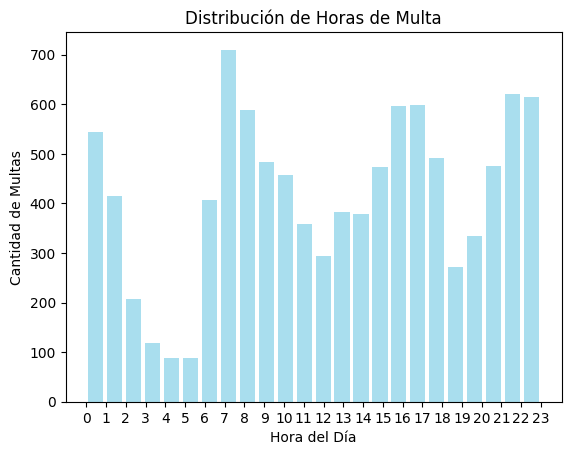

In [ ]:
df_limpio['Time Of Stop'] = pd.to_datetime(df_limpio['Time Of Stop'], format='%H:%M:%S')
df_limpio['Hour'] = df_limpio['Time Of Stop'].dt.hour
print(df_limpio[['Time Of Stop', 'Hour']].head())

# Histograma
df_limpio['Hour'].plot(kind='hist', bins=24, rwidth=0.8, color="#A9DEEE")


plt.title('Distribución de Horas de Multa')
plt.xlabel('Hora del Día')
plt.ylabel('Cantidad de Multas')
plt.xticks(range(0, 24))
plt.show()

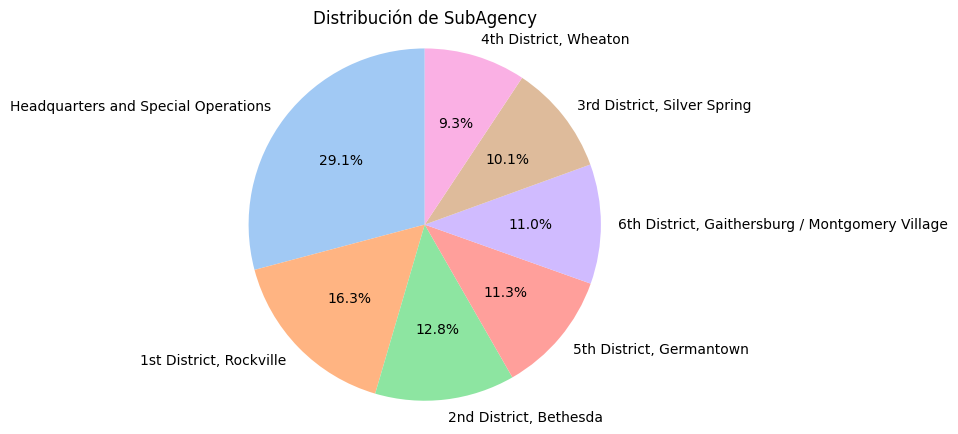

In [ ]:
subagency_counts = df_limpio['SubAgency'].value_counts()
colors = sns.color_palette("pastel", len(subagency_counts))

plt.figure(figsize=(5,5))
plt.pie(subagency_counts, labels=subagency_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribución de SubAgency')
plt.axis('equal')

plt.show()

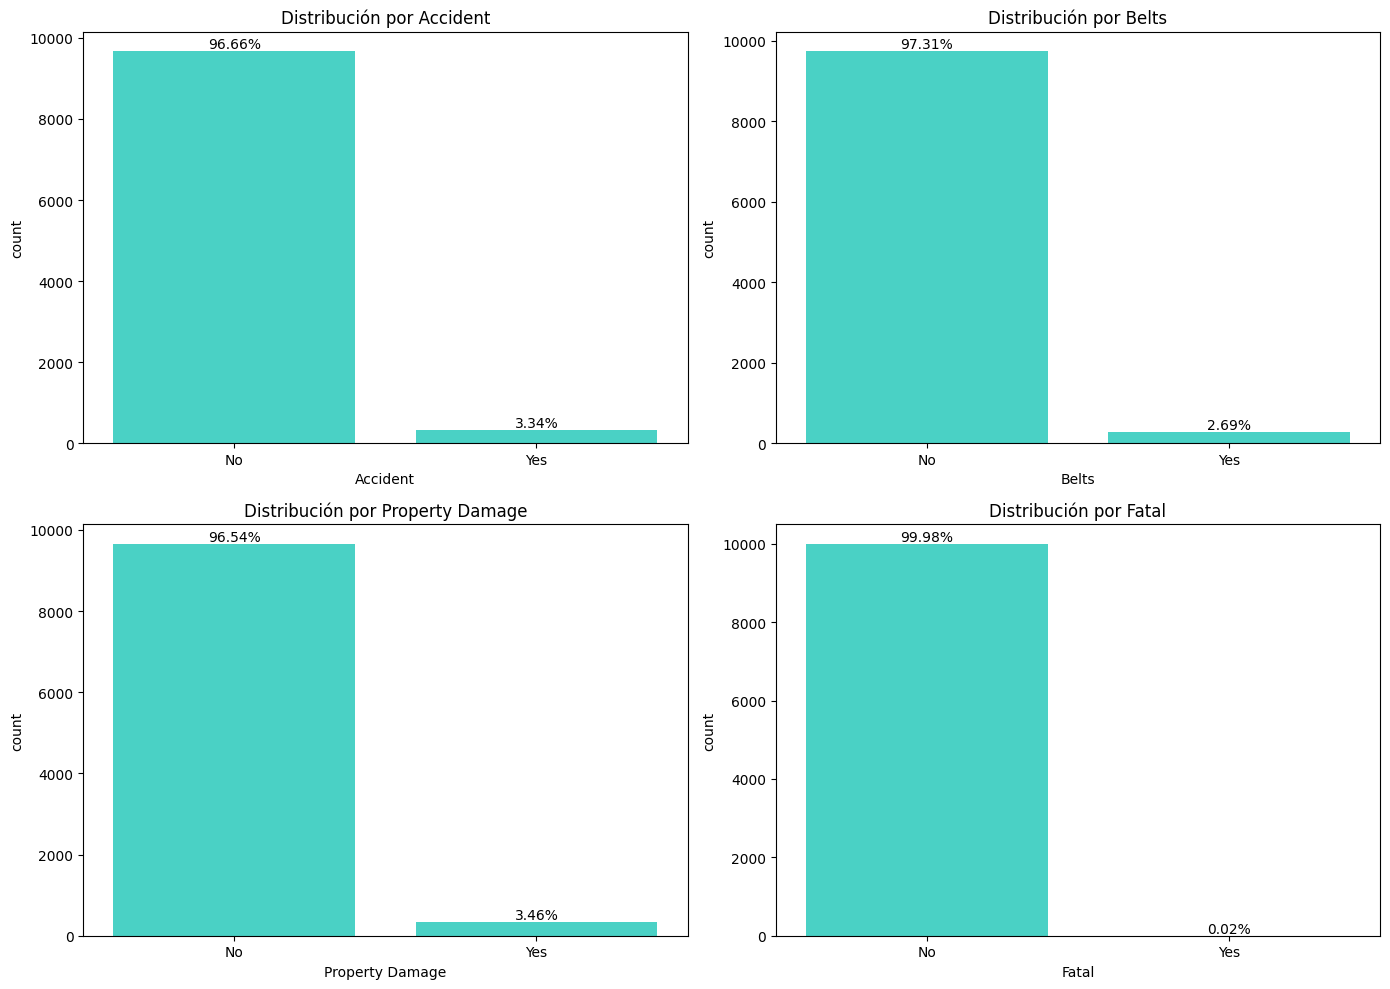

In [ ]:
columnas = ['Accident', 'Belts', 'Property Damage', 'Fatal']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
axes = axes.flatten()

for i, col in enumerate(columnas):
    ax = sns.countplot(x=col, data=df_limpio, color="#33E8D8", ax=axes[i])
    total = len(df_limpio[col])
    for p in ax.patches:
        count = p.get_height()
        percentage = f'{100 * count / total:.2f}%'
        ax.text(p.get_x() + p.get_width() / 2.,
                p.get_height(),
                percentage,
                ha='center',
                va='bottom')
    ax.set_title(f'Distribución por {col}')

plt.tight_layout()
plt.show()

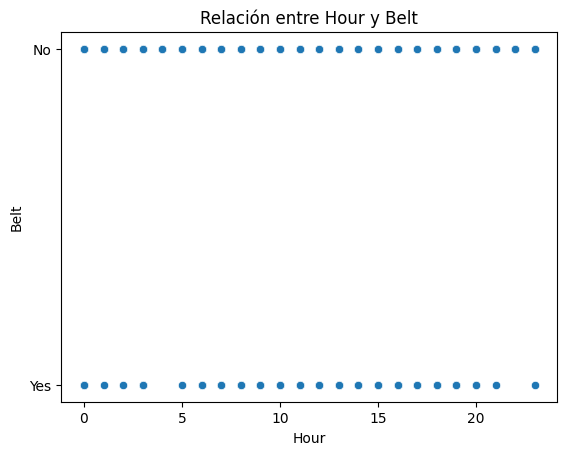

In [ ]:
sns.scatterplot(data=df_limpio, x='Hour', y='Belts')

plt.title('Relación entre Hour y Belt')
plt.xlabel('Hour')
plt.ylabel('Belt')
plt.show()

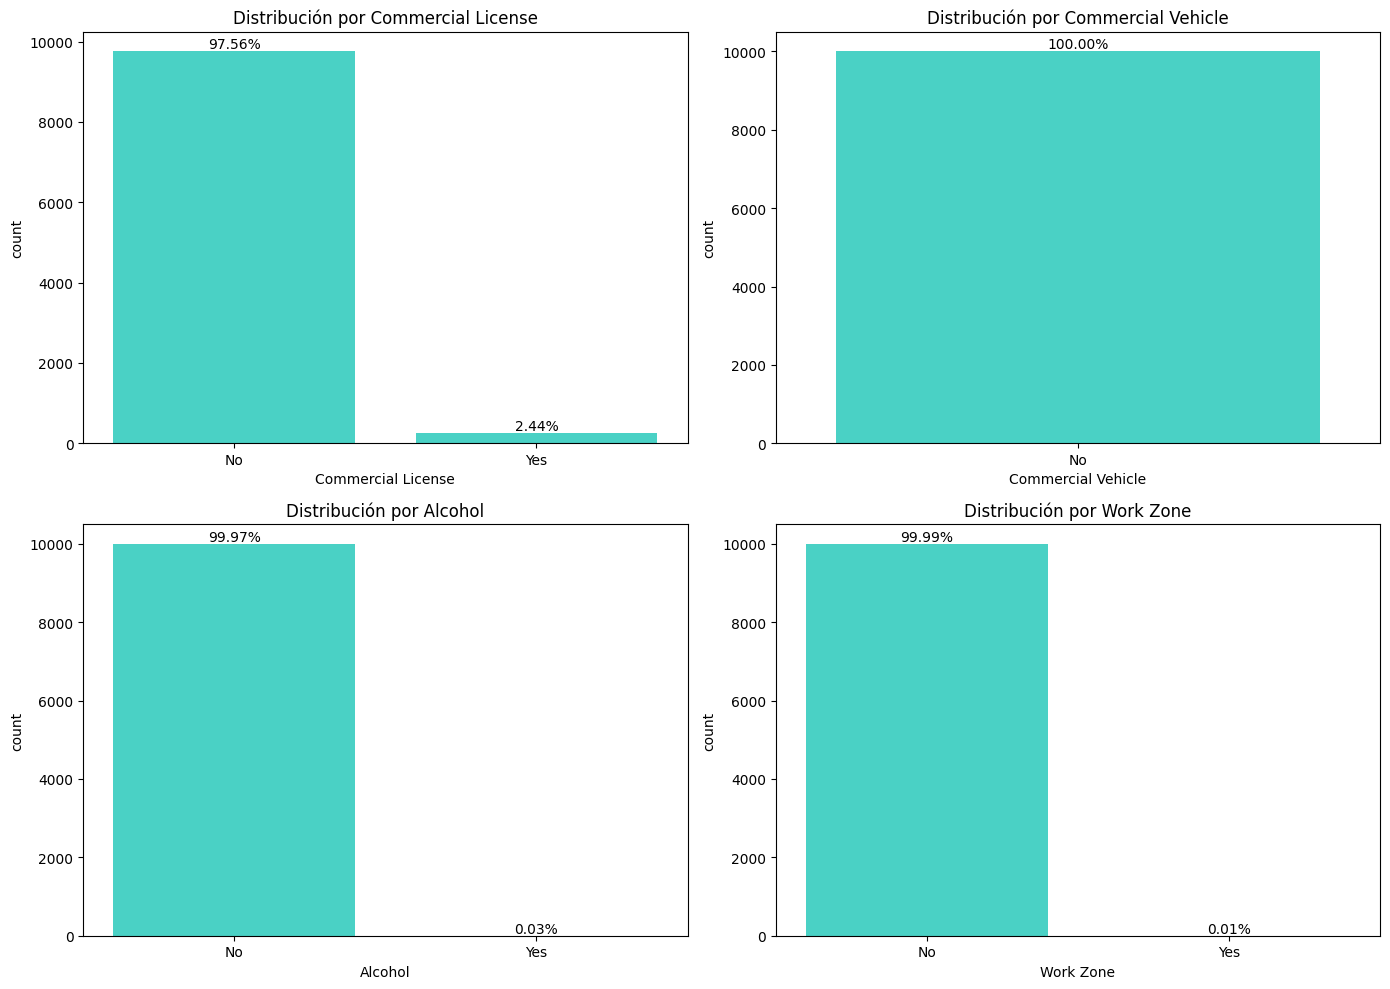

In [ ]:
columns = ['Commercial License', 'Commercial Vehicle', 'Alcohol', 'Work Zone']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
axes = axes.flatten()

for i, col in enumerate(columns):
    ax = sns.countplot(x=col, data=df_limpio, color="#33E8D8", ax=axes[i])
    total = len(df_limpio[col])
    for p in ax.patches:
        count = p.get_height()
        percentage = f'{100 * count / total:.2f}%'
        ax.text(p.get_x() + p.get_width() / 2.,
                p.get_height(),
                percentage,
                ha='center',
                va='bottom')

    ax.set_title(f'Distribución por {col}')

plt.tight_layout()
plt.show()

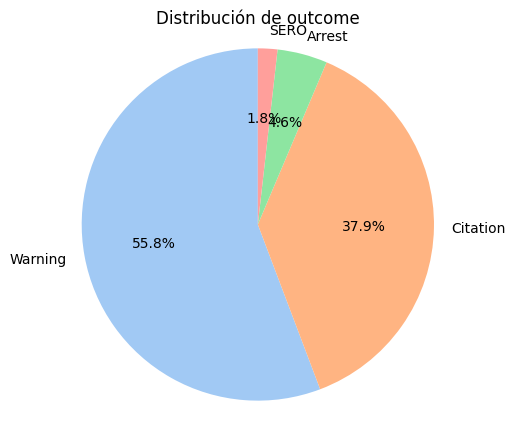

In [ ]:
outcome_counts = df_limpio['Search Outcome'].value_counts()
colors = sns.color_palette("pastel", len(outcome_counts))

plt.figure(figsize=(5, 5))
plt.pie(outcome_counts, labels=outcome_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribución de outcome')
plt.axis('equal')

plt.show()

In [ ]:
tabla_stop = pd.crosstab(index=df_limpio['Search Reason For Stop'], columns='count')
print(tabla_stop)

col_0                   count
Search Reason For Stop       
10-319.1                    3
11-390.21                   8
11-391.41(a)                7
11-393.43                   1
11-393.9                   12
...                       ...
64*                        77
65*                        16
67                          2
81                          1
87*                         5

[170 rows x 1 columns]


C:\Users\USER\AppData\Local\Temp\ipykernel_23724\2432043280.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


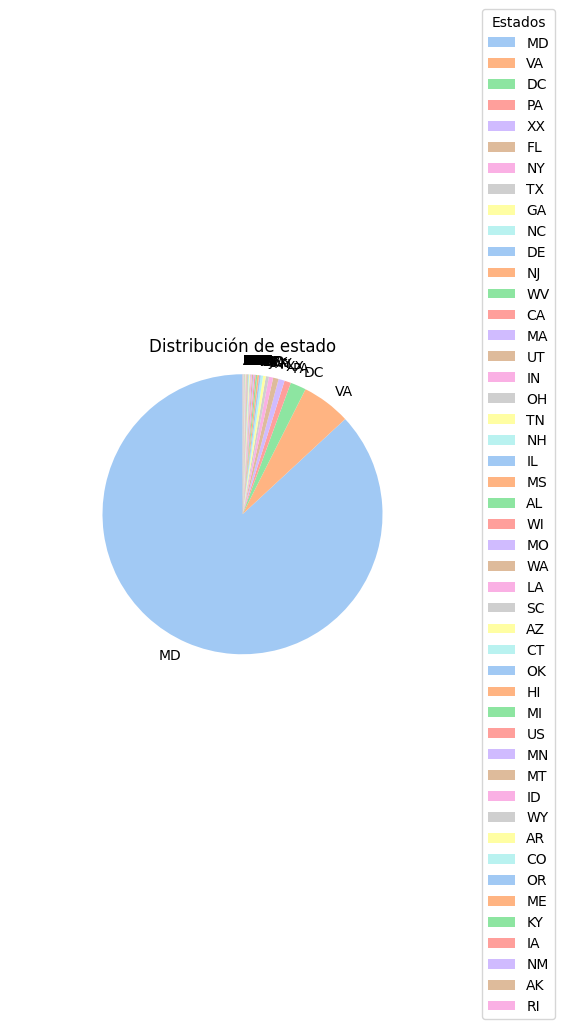

In [ ]:
estado_counts = df_limpio['State'].value_counts()
colors = sns.color_palette("pastel", len(estado_counts))

plt.figure(figsize=(6, 4))
plt.pie(estado_counts, labels=estado_counts.index, startangle=90, colors=colors)
plt.legend(estado_counts.index, title="Estados", loc="center left", bbox_to_anchor=(1, 0.5))
plt.title('Distribución de estado')
plt.axis('equal')

plt.tight_layout()
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_23724\1283508682.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_filtered, x='Model', palette='Set2')


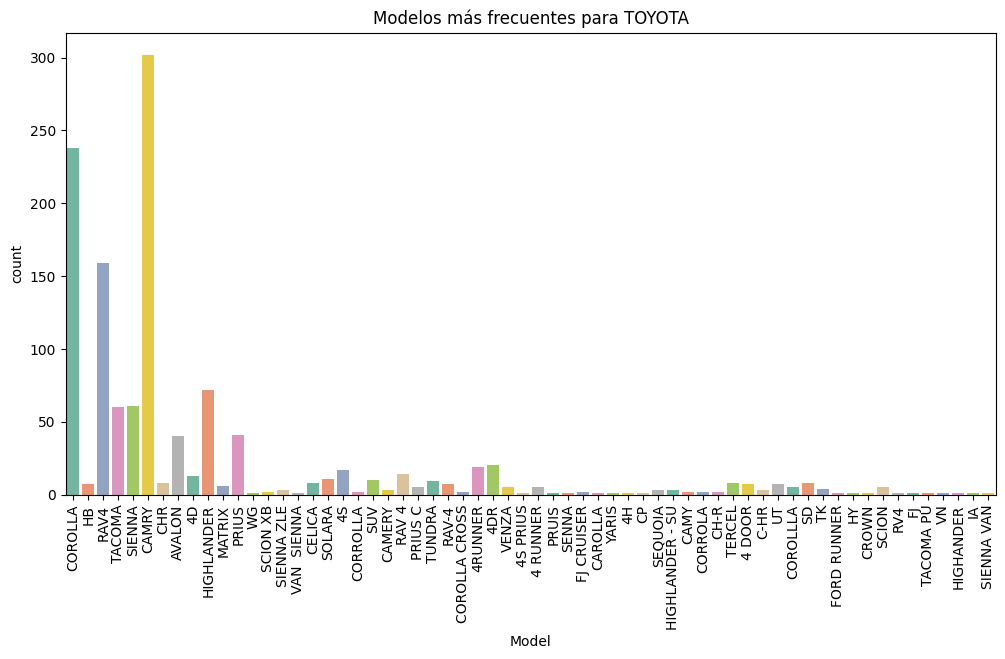

In [ ]:
most_common_make = df_limpio['Make'].value_counts().idxmax()
df_filtered = df_limpio[df_limpio['Make'] == most_common_make]

# grafico de barras agrupadas para Modelo frecuente en marca
plt.figure(figsize=(12, 6))
sns.countplot(data=df_filtered, x='Model', palette='Set2')
plt.title(f'Modelos más frecuentes para {most_common_make}')
plt.xticks(rotation=90)

plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_23724\2707283975.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_filtered_model, x='Color', palette='Set2')


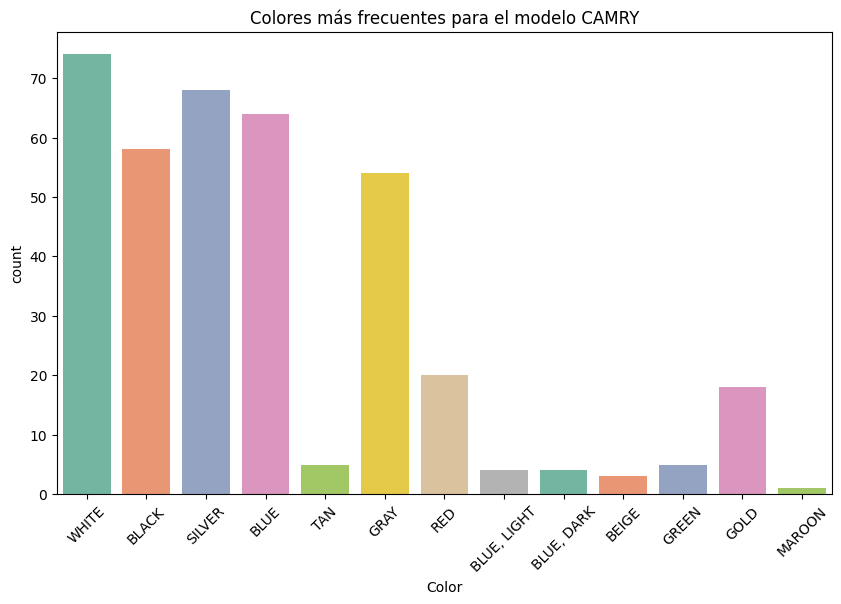

In [ ]:
df_filtered_model = df_limpio[df_limpio['Model'] == 'CAMRY']

plt.figure(figsize=(10, 6))
sns.countplot(data=df_filtered_model, x='Color', palette='Set2')
plt.title('Colores más frecuentes para el modelo CAMRY')
plt.xticks(rotation=45)

plt.show()

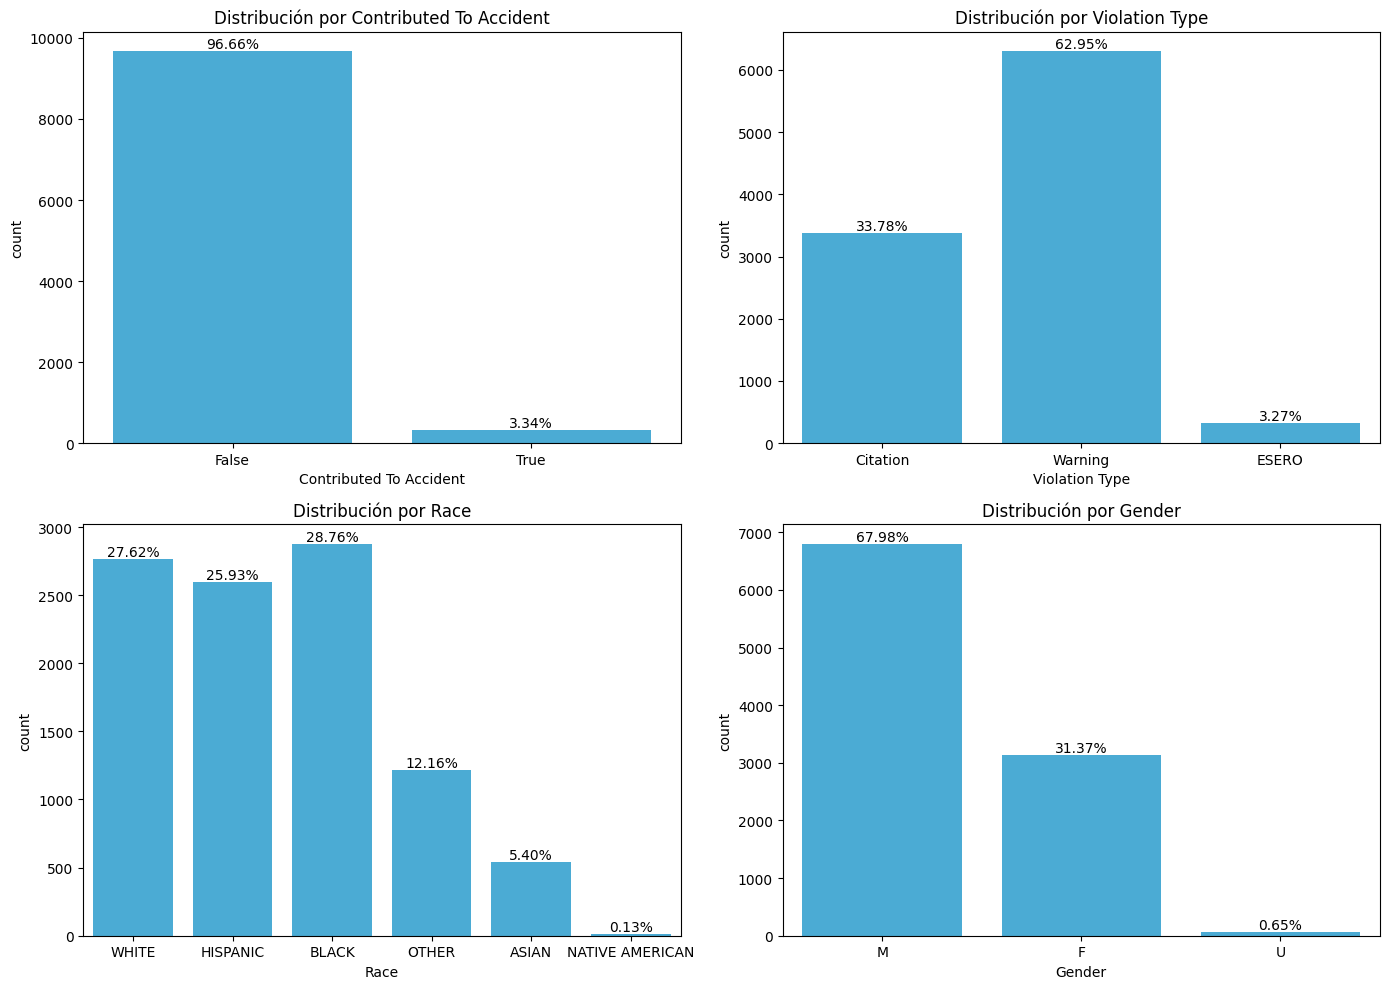

In [ ]:
colu = ['Contributed To Accident','Violation Type', 'Race', 'Gender']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
axes = axes.flatten()

for i, col in enumerate(colu):
    ax = sns.countplot(x=col, data=df_limpio, color="#34B4EB", ax=axes[i])
    total = len(df_limpio[col])
    for p in ax.patches:
        count = p.get_height()
        percentage = f'{100 * count / total:.2f}%'
        ax.text(p.get_x() + p.get_width() / 2.,
                p.get_height(),
                percentage,
                ha='center',
                va='bottom')

    ax.set_title(f'Distribución por {col}')

plt.tight_layout()
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_23724\3987730934.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_limpio['Year'], palette='Set3')


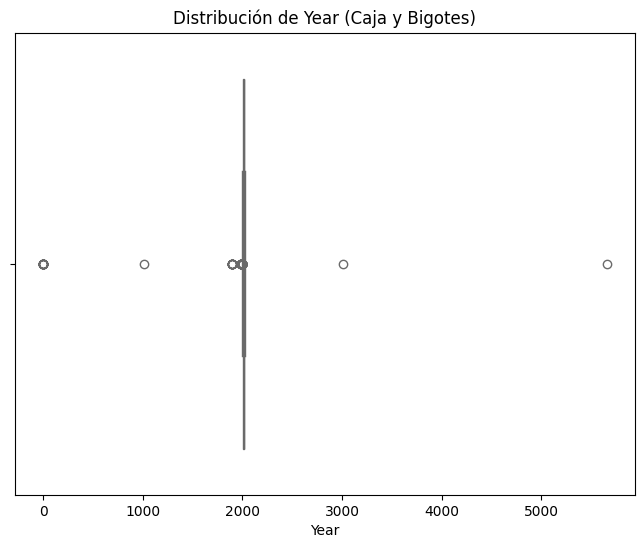

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_limpio['Year'], palette='Set3')
plt.title('Distribución de Year (Caja y Bigotes)')

plt.show()

In [ ]:
tabla_year = pd.crosstab(index=df_limpio['Year'], columns='count')
print(tabla_year)

col_0   count
Year         
0.0        17
1016.0      1
1900.0     11
1987.0      1
1990.0      6
1991.0      1
1992.0     13
1993.0      7
1994.0     14
1995.0     34
1996.0     24
1997.0     25
1998.0     25
1999.0     53
2000.0     98
2001.0     80
2002.0    145
2003.0    159
2004.0    219
2005.0    228
2006.0    249
2007.0    297
2008.0    358
2009.0    263
2010.0    324
2011.0    398
2012.0    455
2013.0    551
2014.0    482
2015.0    653
2016.0    660
2017.0    628
2018.0    683
2019.0    614
2020.0    550
2021.0    540
2022.0    544
2023.0    411
2024.0    176
2025.0      1
3013.0      1
5657.0      1


Al observar los datos atipicos se va a realizar la corrección de algunos datos esto debido a que son erroneos y generan errores para analisis los valores 1016 y 3013 se cambiaran por 2016 y 2013 respectivamente adicionalmente los numeros 0 y 5657 se podrian eliminar sin embargo se reemplazaran con el año con mayor frecuencia.

In [ ]:
df_limpio['Year'] = df_limpio['Year'].replace({1016: 2016, 3013: 2013, 2025:2024})
year_mode = df_limpio['Year'].mode()[0]
df_limpio['Year'] = df_limpio['Year'].replace({0: year_mode, 5657: year_mode, 1900: year_mode})

C:\Users\USER\AppData\Local\Temp\ipykernel_23724\2973171783.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_limpio['Year'], palette='Set3')


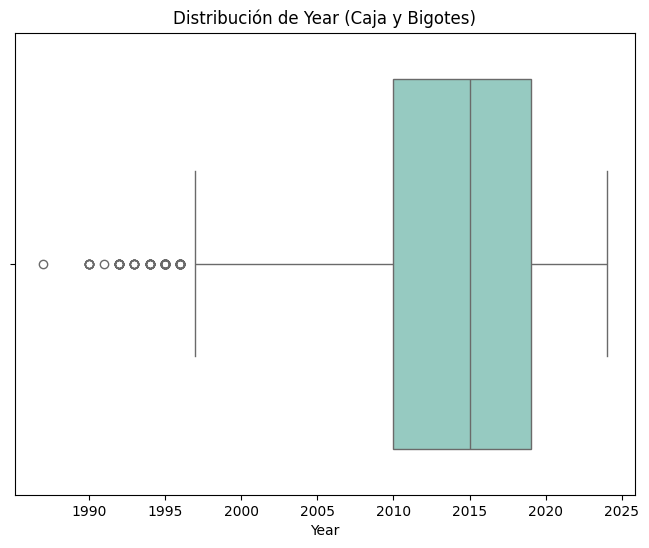

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_limpio['Year'], palette='Set3')
plt.title('Distribución de Year (Caja y Bigotes)')
plt.show()

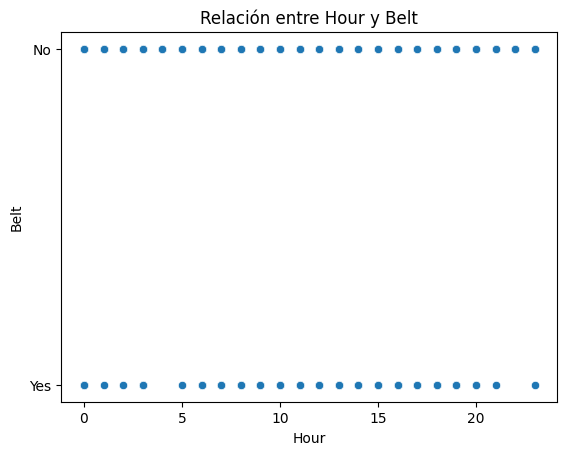

In [ ]:
sns.scatterplot(data=df_limpio, x='Hour', y='Belts')

plt.title('Relación entre Hour y Belt')
plt.xlabel('Hour')
plt.ylabel('Belt')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_23724\2063886086.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Arrest Type', data=df_limpio, palette='Set2')


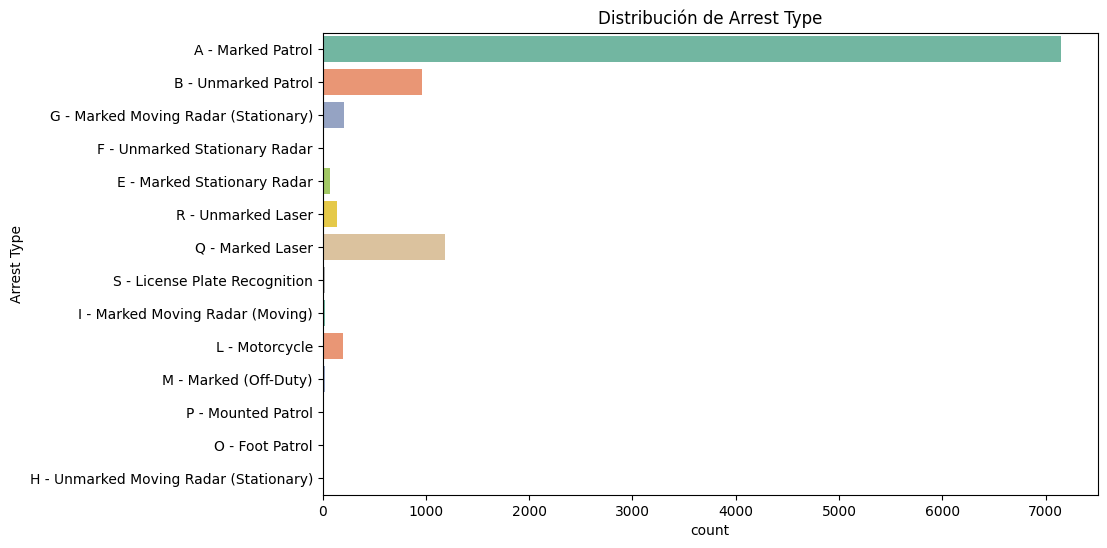

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Arrest Type', data=df_limpio, palette='Set2')
plt.title('Distribución de Arrest Type')

plt.show()

### Creación de la tabla

In [ ]:
trafico = df_limpio[['SeqID', 'Date Of Stop', 'Hour', 'SubAgency', 'Description',
                    'Accident', 'Belts', 'Fatal', 'Commercial Vehicle', 'Work Zone',
                    'Alcohol', 'Make', 'Model', 'Color', 'Search Reason For Stop',
                    'State', 'VehicleType', 'Year', 'Violation Type', 'Charge', 'Race',
                    'Gender', 'Driver City', 'Arrest Type', 'Personal Injury']]

trafico = trafico.rename(columns={
    'Date Of Stop': 'Date_Of_Stop',
    'Time Of Stop': 'Time_Of_Stop',
    'Search Reason For Stop': 'Search_Reason_For_Stop',
    'Commercial Vehicle': 'Commercial_Vehicle',
    'Violation Type': 'Violation_Type',
    'Driver City': 'Driver_City',
    'Arrest Type': 'Arrest_Type',
    "Personal Injury": "Personal_Injury",
    "Work Zone": "Work_Zone"
})


In [ ]:
trafico

,SeqID,Date_Of_Stop,Hour,SubAgency,Description,Accident,Belts,Fatal,Commercial_Vehicle,Work_Zone,...,State,VehicleType,Year,Violation_Type,Charge,Race,Gender,Driver_City,Arrest_Type,Personal_Injury
0,52282e8c-f2e1-4bb5-8509-2d5e4f8da8ca,05/01/2023,23,"3rd District, Silver Spring",OPERATING UNREGISTERED MOTOR VEHICLE ON HIGHWAY,No,No,No,No,No,...,MD,02 - Automobile,2007.0,Citation,13-401(b1),WHITE,M,GAITHERSBURG,A - Marked Patrol,No
1,9be35886-e00c-49c2-8f27-2f6307696a17,11/25/2023,0,"6th District, Gaithersburg / Montgomery Village",FAILURE TO DISPLAY REGISTRATION CARD UPON DEMA...,No,No,No,No,No,...,MD,02 - Automobile,2013.0,Citation,13-409(b),HISPANIC,M,SILVER SPRING,A - Marked Patrol,No
2,9be35886-e00c-49c2-8f27-2f6307696a17,11/25/2023,0,"6th District, Gaithersburg / Montgomery Village",DISPLAYING EXPIRED REGISTRATION PLATE ISSUED B...,No,No,No,No,No,...,MD,02 - Automobile,2013.0,Citation,13-411(f),HISPANIC,M,SILVER SPRING,A - Marked Patrol,No
3,4d37fa99-0df3-4a56-9ba6-692bce894a34,11/26/2023,9,"4th District, Wheaton",DRIVING VEHICLE WHILE UNDER THE INFLUENCE OF A...,No,No,No,No,No,...,MD,02 - Automobile,2004.0,Citation,21-902(a1i),HISPANIC,M,SILVER SPRING,A - Marked Patrol,No
4,3a723e9a-5dc0-4bc3-9bd9-4555d6ce0e49,11/25/2023,5,"4th District, Wheaton",RECKLESS DRIVING VEHICLE IN WANTON AND WILLFUL...,No,No,No,No,No,...,MD,02 - Automobile,2022.0,Citation,21-901.1(a),WHITE,M,GAITHERSBURG,A - Marked Patrol,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,79177997-5812-4f10-95c1-775bbba39f94,07/31/2024,17,"6th District, Gaithersburg / Montgomery Village",DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC...,No,No,No,No,No,...,MD,02 - Automobile,2014.0,Warning,21-201(a1),BLACK,F,SILVER SPRING,A - Marked Patrol,No
9996,bdfc1e48-5faf-49a5-b40c-2d6389a8653f,07/31/2024,8,"1st District, Rockville",EXCEEDING THE POSTED SPEED LIMIT OF 40 MPH,No,No,No,No,No,...,MD,02 - Automobile,2006.0,Warning,21-801.1,HISPANIC,M,WASHINGTON,Q - Marked Laser,No
9997,82a5f3d0-f063-4612-9559-3eae9c4b7f32,07/31/2024,8,"1st District, Rockville",EXCEEDING THE POSTED SPEED LIMIT OF 40 MPH,No,No,No,No,No,...,MD,02 - Automobile,2018.0,Warning,21-801.1,WHITE,F,GAITHERSBURG,Q - Marked Laser,No
9998,cff82265-e6bb-4c89-9943-c579eafc95a0,07/31/2024,9,"1st District, Rockville",EXCEEDING THE POSTED SPEED LIMIT OF 40 MPH,No,No,No,No,No,...,MD,02 - Automobile,2016.0,Warning,21-801.1,WHITE,M,SILVER SPRING,Q - Marked Laser,No


In [ ]:
print(df.columns)

Index(['SeqID', 'Date Of Stop', 'Time Of Stop', 'Agency', 'SubAgency',
       'Description', 'Location', 'Latitude', 'Longitude', 'Accident', 'Belts',
       'Personal Injury', 'Property Damage', 'Fatal', 'Commercial License',
       'HAZMAT', 'Commercial Vehicle', 'Alcohol', 'Work Zone',
       'Search Conducted', 'Search Disposition', 'Search Outcome',
       'Search Reason', 'Search Reason For Stop', 'Search Type',
       'Search Arrest Reason', 'State', 'VehicleType', 'Year', 'Make', 'Model',
       'Color', 'Violation Type', 'Charge', 'Article',
       'Contributed To Accident', 'Race', 'Gender', 'Driver City',
       'Driver State', 'DL State', 'Arrest Type', 'Geolocation'],
      dtype='object')


In [ ]:
print(trafico.shape)


(10000, 25)


# AWS

In [ ]:
# Librerías requeridas para la conexión y muestra de información
import psycopg2 as ps
import pandas as pd

In [ ]:
#parámetros de conexión AWS, usar variables de entorno
host = "proyecto-rojas-matajira-vargas-torres.cyl57dezfswm.us-east-1.rds.amazonaws.com"
port = '5432'
user = 'postgres'
password = 'elmejorproyecto'
database = 'postgres' #verificar la existencia de la base datos

In [ ]:
try:
    connps = ps.connect(host=host,database=database,user=user,password=password,port=port)
except ps.OperationalError as e:
    raise e
else:
    print('Connected!')

Connected!


In [ ]:
# librerias
import re
import io
from unicodedata import normalize
from sqlalchemy import create_engine
from sqlalchemy import Column
from sqlalchemy import ForeignKey
from sqlalchemy import Integer
from sqlalchemy import String
from sqlalchemy.orm import declarative_base
from sqlalchemy.orm import relationship

In [ ]:
connAlchemy = create_engine(f'postgresql://{user}:{password}@{host}:{port}/{database}')
conn = connAlchemy.raw_connection()
cur = conn.cursor()

In [ ]:
Base = declarative_base()

In [ ]:
class Violaciones_Trafico_bd1(Base):
    __tablename__= "Violaciones_Trafico_bd1"
    SeqID= Column(String(1000),primary_key=True)
    Date_Of_Stop = Column(String(30))
    Hour = Column(Integer)
    SubAgency = Column(String(1000))
    Description = Column(String(1000))
    Accident = Column(String(1000))
    Belts =Column(String(30))
    Fatal = Column(String(30))
    Commercial_Vehicle = Column(String(1000))
    Work_Zone = Column(String(1000))
    Alcohol = Column(String(30))
    Make = Column(String(30))
    Model =Column(String(30))
    Color = Column(String(30))
    Search_Reason_For_Stop =Column(String(1000))
    State = Column(String(1000))
    VehicleType = Column(String(1000))
    Year = Column(String(30))
    Violation_Type = Column(String(1000))
    Charge = Column(String(1000))
    Race = Column(String(30))
    Gender = Column(String(30))
    Driver_City = Column(String(1000))
    Arrest_Type = Column(String(1000))
    Personal_Injury = Column(String(1000))

    def __repr__(self):
        return f"Violaciones_Trafico_bd1(SeqID={self.SeqID!r}, Date_Of_Stop={self.Date_Of_Stop!r}, Hour={self.Hour!r}, \
        SubAgency={self.SubAgency!r}, Description={self.Description!r}, Accident={self.Accident!r}, Belts={self.Belts!r}, Fatal={self.Fatal!r}, Commercial_Vehicle={self.Commercial_Vehicle!r}, \
        Work_Zone={self.Work_Zone!r}, Alcohol={self.Alcohol!r}, Make={self.Make!r}, Model={self.Model!r}, Color={self.Color!r}, Search_Reason_For_Stop={self.Search_Reason_For_Stop!r}, \
        State={self.State!r}, VehicleType={self.VehicleType!r}, Year={self.Year!r}, Violation_Type={self.Violation_Type!r}, Charge{self.Charge!r}, \
        Race={self.Race!r}, Gender={self.Gender!r}, Driver_City={self.Driver_City!r}, Arrest_Type={self.Arrest_Type!r}, Personal_Injury={self.Personal_Injury!r}"

In [ ]:
Base.metadata.create_all(connAlchemy)

In [ ]:
from sqlalchemy.orm import Session

In [ ]:
from io import StringIO

output = StringIO()
x = trafico.to_csv(output, sep=';', header=False, index=False, columns=trafico.columns)
output.getvalue()
# jump to start of stream
output.seek(0)


0

In [ ]:
# Esta linea demora en cargar toca correrla 2 veces
connection = connAlchemy.raw_connection()
with connection.cursor() as cursor:
    cursor.copy_from(output, "Violaciones_Trafico_bd1", sep=';', null="NULL", columns=(trafico.columns))
    connection.commit()

In [ ]:
#Este codigo fue para meter la tabla Trafico en AWS, pero como ya está cargada no es necesario correrla otra vez
batch_size = 200 #esto se realizo debido a que el tiempo para cargar los datos era muy largo

for i in range(0, len(trafico), batch_size):
    # Seleccionar un lote de filas
    batch = trafico.iloc[i:i+batch_size]

    try:
        # Insertar el lote en la tabla
        batch.to_sql('base_de_Datos_Trafico', connAlchemy, if_exists='append', index=False)

    except Exception as e:
        print(f"Error en el lote {i // batch_size + 1}: {e}")

# Machine learning

In [ ]:
# Librerías necesarias
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


In [ ]:
#df = pd.read_csv('datasets/household_power_consumption.csv' , dtype=str, sep=';')

df_fraccion = trafico.sample(frac=0.05)
df_fraccion.head()

,SeqID,Date_Of_Stop,Hour,SubAgency,Description,Accident,Belts,Fatal,Commercial_Vehicle,Work_Zone,...,State,VehicleType,Year,Violation_Type,Charge,Race,Gender,Driver_City,Arrest_Type,Personal_Injury
3250,e7b45770-52e0-4636-9199-15ac7beaf8b2,11/29/2023,17,"3rd District, Silver Spring",FAILURE TO DISPLAY & REFLECT RED COLOR LIGHT O...,No,No,No,No,No,...,MD,02 - Automobile,2012.0,Warning,22-209(b),BLACK,F,SILVER SPRING,A - Marked Patrol,No
9440,c7c4e6fd-46fe-44b1-b78f-06e06e28b8f0,07/29/2024,22,"1st District, Rockville",FAILURE OF VEH. DRIVER TO DISPLAY CURRENT REG....,No,No,No,No,No,...,MD,02 - Automobile,2017.0,Warning,13-701(a),HISPANIC,M,SILVER SPRING,A - Marked Patrol,No
4731,3842e87e-6fb9-4819-a474-cf413dd97409,12/02/2023,23,"6th District, Gaithersburg / Montgomery Village",VEH. HWY. OPERATION WITH INADEQUATE REAR RED L...,No,No,No,No,No,...,MD,02 - Automobile,2016.0,Warning,22-210(c),HISPANIC,M,SILVER SPRING,A - Marked Patrol,No
7128,ca143953-f7ed-4bd8-9f92-89196d73731d,12/06/2023,16,"5th District, Germantown",HEADLIGHTS (*),No,No,No,No,No,...,MD,02 - Automobile,2004.0,ESERO,55*,OTHER,F,SILVER SPRING,A - Marked Patrol,No
1020,b935a67c-da15-4092-8212-bcc38c9c5455,07/22/2024,8,"3rd District, Silver Spring",DISPLAYING EXPIRED REGISTRATION PLATE ISSUED B...,No,Yes,No,No,No,...,MD,02 - Automobile,2015.0,Warning,13-411(f),BLACK,F,SILVER SPRING,A - Marked Patrol,No


In [ ]:
trafico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SeqID                   10000 non-null  object 
 1   Date_Of_Stop            10000 non-null  object 
 2   Hour                    10000 non-null  int32  
 3   SubAgency               10000 non-null  object 
 4   Description             10000 non-null  object 
 5   Accident                10000 non-null  object 
 6   Belts                   10000 non-null  object 
 7   Fatal                   10000 non-null  object 
 8   Commercial_Vehicle      10000 non-null  object 
 9   Work_Zone               10000 non-null  object 
 10  Alcohol                 10000 non-null  object 
 11  Make                    10000 non-null  object 
 12  Model                   10000 non-null  object 
 13  Color                   10000 non-null  object 
 14  Search_Reason_For_Stop  10000 non-null 

#### Limpieza del conjunto de datos

In [ ]:
df_fraccion.isna().sum()

SeqID                     0
Date_Of_Stop              0
Hour                      0
SubAgency                 0
Description               0
Accident                  0
Belts                     0
Fatal                     0
Commercial_Vehicle        0
Work_Zone                 0
Alcohol                   0
Make                      0
Model                     0
Color                     0
Search_Reason_For_Stop    0
State                     0
VehicleType               0
Year                      0
Violation_Type            0
Charge                    0
Race                      0
Gender                    0
Driver_City               0
Arrest_Type               0
Personal_Injury           0
dtype: int64

#### Identificación de NaN

In [ ]:
df_fraccion_sin_null = df_fraccion[df_fraccion.notnull()]

In [ ]:
df_fraccion_sin_null.head()

,SeqID,Date_Of_Stop,Hour,SubAgency,Description,Accident,Belts,Fatal,Commercial_Vehicle,Work_Zone,...,State,VehicleType,Year,Violation_Type,Charge,Race,Gender,Driver_City,Arrest_Type,Personal_Injury
3250,e7b45770-52e0-4636-9199-15ac7beaf8b2,11/29/2023,17,"3rd District, Silver Spring",FAILURE TO DISPLAY & REFLECT RED COLOR LIGHT O...,No,No,No,No,No,...,MD,02 - Automobile,2012.0,Warning,22-209(b),BLACK,F,SILVER SPRING,A - Marked Patrol,No
9440,c7c4e6fd-46fe-44b1-b78f-06e06e28b8f0,07/29/2024,22,"1st District, Rockville",FAILURE OF VEH. DRIVER TO DISPLAY CURRENT REG....,No,No,No,No,No,...,MD,02 - Automobile,2017.0,Warning,13-701(a),HISPANIC,M,SILVER SPRING,A - Marked Patrol,No
4731,3842e87e-6fb9-4819-a474-cf413dd97409,12/02/2023,23,"6th District, Gaithersburg / Montgomery Village",VEH. HWY. OPERATION WITH INADEQUATE REAR RED L...,No,No,No,No,No,...,MD,02 - Automobile,2016.0,Warning,22-210(c),HISPANIC,M,SILVER SPRING,A - Marked Patrol,No
7128,ca143953-f7ed-4bd8-9f92-89196d73731d,12/06/2023,16,"5th District, Germantown",HEADLIGHTS (*),No,No,No,No,No,...,MD,02 - Automobile,2004.0,ESERO,55*,OTHER,F,SILVER SPRING,A - Marked Patrol,No
1020,b935a67c-da15-4092-8212-bcc38c9c5455,07/22/2024,8,"3rd District, Silver Spring",DISPLAYING EXPIRED REGISTRATION PLATE ISSUED B...,No,Yes,No,No,No,...,MD,02 - Automobile,2015.0,Warning,13-411(f),BLACK,F,SILVER SPRING,A - Marked Patrol,No


In [ ]:
df_fraccion_sin_null.dropna(how='any', inplace=True)
df_fraccion_sin_null.head(3)

,SeqID,Date_Of_Stop,Hour,SubAgency,Description,Accident,Belts,Fatal,Commercial_Vehicle,Work_Zone,...,State,VehicleType,Year,Violation_Type,Charge,Race,Gender,Driver_City,Arrest_Type,Personal_Injury
3250,e7b45770-52e0-4636-9199-15ac7beaf8b2,11/29/2023,17,"3rd District, Silver Spring",FAILURE TO DISPLAY & REFLECT RED COLOR LIGHT O...,No,No,No,No,No,...,MD,02 - Automobile,2012.0,Warning,22-209(b),BLACK,F,SILVER SPRING,A - Marked Patrol,No
9440,c7c4e6fd-46fe-44b1-b78f-06e06e28b8f0,07/29/2024,22,"1st District, Rockville",FAILURE OF VEH. DRIVER TO DISPLAY CURRENT REG....,No,No,No,No,No,...,MD,02 - Automobile,2017.0,Warning,13-701(a),HISPANIC,M,SILVER SPRING,A - Marked Patrol,No
4731,3842e87e-6fb9-4819-a474-cf413dd97409,12/02/2023,23,"6th District, Gaithersburg / Montgomery Village",VEH. HWY. OPERATION WITH INADEQUATE REAR RED L...,No,No,No,No,No,...,MD,02 - Automobile,2016.0,Warning,22-210(c),HISPANIC,M,SILVER SPRING,A - Marked Patrol,No


In [ ]:
# descripción del conjunto de datos
df_fraccion_sin_null.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 3250 to 8988
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SeqID                   500 non-null    object 
 1   Date_Of_Stop            500 non-null    object 
 2   Hour                    500 non-null    int32  
 3   SubAgency               500 non-null    object 
 4   Description             500 non-null    object 
 5   Accident                500 non-null    object 
 6   Belts                   500 non-null    object 
 7   Fatal                   500 non-null    object 
 8   Commercial_Vehicle      500 non-null    object 
 9   Work_Zone               500 non-null    object 
 10  Alcohol                 500 non-null    object 
 11  Make                    500 non-null    object 
 12  Model                   500 non-null    object 
 13  Color                   500 non-null    object 
 14  Search_Reason_For_Stop  500 non-null    obj

In [ ]:
print(df_limpio.dtypes)

SeqID                              object
Date Of Stop                       object
Time Of Stop               datetime64[ns]
SubAgency                          object
Description                        object
Location                           object
Latitude                          float64
Longitude                         float64
Accident                           object
Belts                              object
Personal Injury                    object
Property Damage                    object
Fatal                              object
Commercial License                 object
Commercial Vehicle                 object
Alcohol                            object
Work Zone                          object
Search Conducted                   object
Search Outcome                     object
Search Reason For Stop             object
State                              object
VehicleType                        object
Year                              float64
Make                              

In [ ]:
df_limpio_numerico = trafico.select_dtypes(include=[float, int])


In [ ]:
# Asegúrate de importar preprocessing desde sklearn
from sklearn import preprocessing

# Eliminar valores nulos del DataFrame
df_limpio_numerico = df_limpio_numerico.dropna()

# Normalizar los datos
normalized_vectors = preprocessing.normalize(df_limpio_numerico)


In [ ]:
df_limpio_numerico = df_limpio_numerico.fillna(df_limpio_numerico.mean())
normalized_vectors = preprocessing.normalize(df_limpio_numerico)


In [ ]:
df_limpio_numerico = df_limpio_numerico.fillna(df_limpio_numerico.median())
normalized_vectors = preprocessing.normalize(df_limpio_numerico)


In [ ]:
print(df_limpio_numerico.isna().sum())  # Ver el número de NaN por columna

Hour    0
Year    0
dtype: int64


In [ ]:
normalized_vectors = preprocessing.normalize(df_limpio_numerico)


#### Normalización

In [ ]:
from sklearn import preprocessing

In [ ]:
normalized_vectors = preprocessing.normalize(df_limpio_numerico)
normalized_vectors

array([[0.01145914, 0.99993434],
       [0.        , 1.        ],
       [0.        , 1.        ],
       ...,
       [0.00396429, 0.99999214],
       [0.00446424, 0.99999004],
       [0.00497754, 0.99998761]])

#### Clusterización

In [ ]:
X = normalized_vectors
X

array([[0.01145914, 0.99993434],
       [0.        , 1.        ],
       [0.        , 1.        ],
       ...,
       [0.00396429, 0.99999214],
       [0.00446424, 0.99999004],
       [0.00497754, 0.99998761]])

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics

In [ ]:
k = 5
kmeans = KMeans(n_clusters=k, init= 'k-means++', random_state=42, n_init=10)
y_pred = kmeans.fit_predict(X)

Exception in thread Thread-7 (_readerthread):
Traceback (most recent call last):
  File "c:\Users\USER\.conda\envs\grupal\Lib\threading.py", line 1073, in _bootstrap_inner
    self.run()
  File "c:\Users\USER\.conda\envs\grupal\Lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "c:\Users\USER\.conda\envs\grupal\Lib\threading.py", line 1010, in run
    self._target(*self._args, **self._kwargs)
  File "c:\Users\USER\.conda\envs\grupal\Lib\subprocess.py", line 1599, in _readerthread
    buffer.append(fh.read())
                  ^^^^^^^^^
  File "<frozen codecs>", line 322, in decode
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 16: invalid start byte
c:\Users\USER\.conda\envs\grupal\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can sil

Text(0.5, 1.0, 'Inercia de k-Means versus número de clusters')

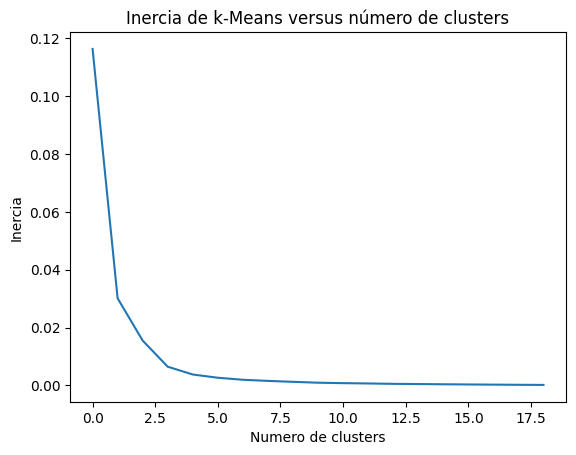

In [ ]:
#https://towardsdatascience.com/explain-ml-in-a-simple-way-k-means-clustering-e925d019743b
scores = [KMeans(n_clusters=i, n_init=10).fit(X).inertia_ for i in range(1,20)]
sns.lineplot( scores)
plt.xlabel('Numero de clusters')
plt.ylabel("Inercia")
plt.title("Inercia de k-Means versus número de clusters")

In [ ]:
for i in range(2,10):
    kmeans = KMeans(i,n_init=10)
    kmeans.fit(X)
    cluster = kmeans.predict(X)
    print(f'clusters:{i}, Inercia:{kmeans.inertia_}')

clusters:2, Inercia:0.030098636871408378
clusters:3, Inercia:0.01547754074853222
clusters:4, Inercia:0.006446761549118668
clusters:5, Inercia:0.003751376335951926
clusters:6, Inercia:0.002574787201101327
clusters:7, Inercia:0.0019292475341851681
clusters:8, Inercia:0.0015270534580320112
clusters:9, Inercia:0.0012163630016957731


In [ ]:
import pandas as pd

# Crear los datos
data = {
    "clusters": [2, 3, 4, 5, 6, 7, 8, 9],
    "Inercia": [0.030130828106658677, 0.015706309309198353, 0.006457258490571872,
                0.003767314697506888, 0.0025726822584323803, 0.001926933177553359,
                0.001533255746055055, 0.0012524982212484342]
}

# Convertir los datos en un DataFrame
clusters_tabla = pd.DataFrame(data)

# Mostrar la tabla
print(clusters_tabla)

   clusters   Inercia
0         2  0.030131
1         3  0.015706
2         4  0.006457
3         5  0.003767
4         6  0.002573
5         7  0.001927
6         8  0.001533
7         9  0.001252


In [ ]:
#Este codigo se utilizó para meter la tabla cluster en AWS, como ya está no es necesario correrla de nuevo

class Clusters4(Base):
    __tablename__= "Clusters4"

    clusters = Column(Integer, primary_key=True)
    Inercia = Column(Integer, primary_key=True)

    def __repr__(self):
        return f"Clusters4(clusters={self.clusters!r}, Inercia={self.Inercia!r}"


In [ ]:
from io import StringIO

output = StringIO()
clusters_tabla.to_csv(output, sep=';', header=False, index=False, columns=clusters_tabla.columns)
output.getvalue()
# jump to start of stream
output.seek(0)


0

In [ ]:
# Insert df into postgres
connection = connAlchemy.raw_connection()
with connection.cursor() as cursor:
    cursor.copy_from(output, "Clusters", sep=';', null="NULL", columns=(clusters_tabla.columns))
    connection.commit()

In [ ]:
connection = connAlchemy.raw_connection()
table_name = 'Clusters'

# Insertar los datos del DataFrame en la tabla
# Si la tabla ya existe, puedes usar el parámetro 'if_exists' para 'append' o 'replace'
clusters_tabla.to_sql(table_name, connAlchemy, if_exists='append', index=False)

print("Datos insertados correctamente.")

Datos insertados correctamente.


#### Asignación de clusteres para cada registro

In [ ]:
kmeans = KMeans(n_clusters=5,n_init=10)
kmeans.fit(X)
cluster = kmeans.predict(X)
cluster[:20]

array([2, 3, 3, 1, 1, 1, 3, 3, 3, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 3],
      dtype=int32)

In [ ]:
len(cluster)


10000

#### Visualización

In [ ]:
print(df_limpio_numerico.count())  # Cuenta los elementos no nulos en cada columna


Hour    10000
Year    10000
dtype: int64


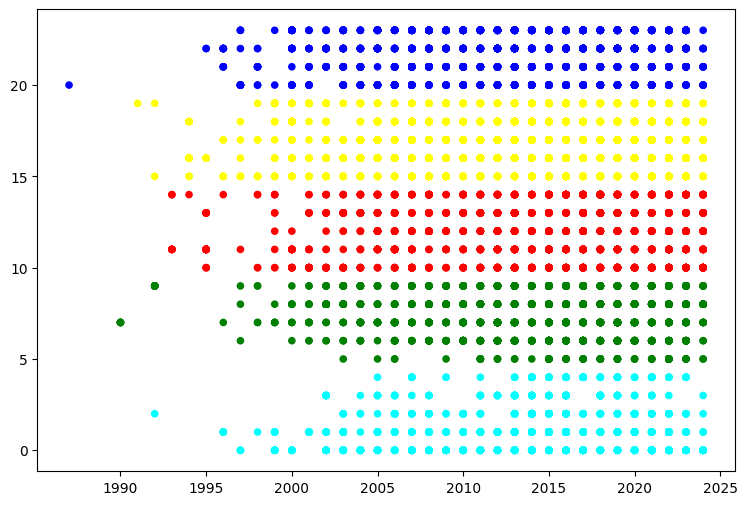

In [ ]:
# Grafica clusters
fig = plt.figure(figsize=(9, 6))
f1 = df_limpio_numerico['Year'].values
f2 = df_limpio_numerico['Hour'].values
asignar=[]
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in cluster:
    asignar.append(colores[row])

plt.scatter(f1, f2, c=asignar, s=20)
plt.show()

In [ ]:
asignar[:10]

['blue',
 'cyan',
 'cyan',
 'green',
 'green',
 'green',
 'cyan',
 'cyan',
 'cyan',
 'blue']

#### Calculo asignación de clusteres

In [ ]:
df_limpio_numerico['k_means'] = cluster
df_limpio_numerico.groupby('k_means').size()/df_limpio.shape[0]

k_means
0    0.1870
1    0.2277
2    0.2047
3    0.1373
4    0.2433
dtype: float64

Text(0.5, 1.0, 'Cluster kmeans')

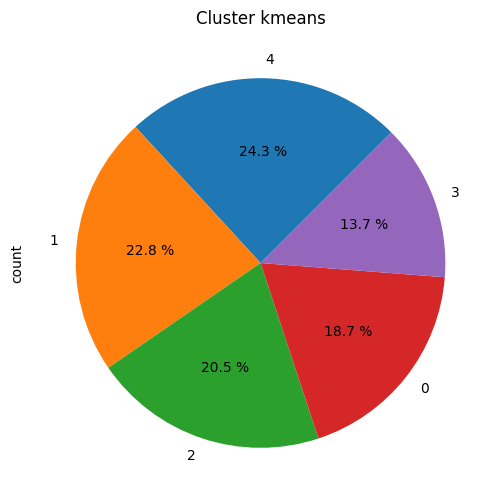

In [ ]:
ax = df_limpio_numerico.k_means.value_counts().plot.pie(startangle=45,
                                     autopct='%.1f %%',
                                     figsize=(8, 6))
ax.set_title("Cluster kmeans")

In [ ]:
import plotly.express as px
import plotly.io as pio

In [ ]:
# Ajuste del renderizador para imagenes en 3d
pio.renderers.default = 'browser'  # o puedes probar con 'svg' o 'png'

In [ ]:
fig2 = px.scatter_3d(df_limpio_numerico.sample(frac=0.1), x='Year', y='Hour', z='k_means',
              color='k_means', width=1200, height=800)
fig2.show()

#### k-means con big data

In [ ]:
from sklearn.cluster import MiniBatchKMeans

In [ ]:
import random
p = 0.5  #50% de los registros
df_percent = trafico.sample(frac=0.05)

In [ ]:
df_percent = df_percent[df_percent.notnull()]
df_percent.dropna(how='any', inplace=True)

In [ ]:
print(df_percent.dtypes)


SeqID                      object
Date_Of_Stop               object
Hour                        int32
SubAgency                  object
Description                object
Accident                   object
Belts                      object
Fatal                      object
Commercial_Vehicle         object
Work_Zone                  object
Alcohol                    object
Make                       object
Model                      object
Color                      object
Search_Reason_For_Stop     object
State                      object
VehicleType                object
Year                      float64
Violation_Type             object
Charge                     object
Race                       object
Gender                     object
Driver_City                object
Arrest_Type                object
Personal_Injury            object
dtype: object


In [ ]:
df_percent_numerico = df_percent.select_dtypes(include=[float, int])
X2 = preprocessing.normalize(df_percent_numerico)

In [ ]:
kmeans2 = KMeans(n_clusters=5, n_init=10)
kmeans2.fit(X2)
cluster2 = kmeans.predict(X2)
len(cluster2)

500

In [ ]:
kmeans3 = MiniBatchKMeans(n_clusters=5,n_init=10)
kmeans3.fit(X2)
cluster3 = kmeans.predict(X2)
len(cluster3)

500

In [ ]:
df_percent_numerico['k_means'] = cluster3

In [ ]:
fig5 = px.scatter_3d(df_percent_numerico.sample(frac=0.5), x='Year', y='Hour', z='k_means',
              color='k_means', width=1200, height=800)
fig5.show()

**Kmeans con variables categoricas**

In [ ]:
from sklearn.preprocessing import OneHotEncoder
pio.renderers.default = 'browser'

columnas_a_analizar = ['Make', 'Model', 'Color', 'Driver_City']

df = trafico[columnas_a_analizar]
encoder = OneHotEncoder()
df_encoded = pd.DataFrame(encoder.fit_transform(df).toarray())


kmeans = KMeans(n_clusters=3)  # Ajusta el número de clusters
kmeans.fit(df_encoded)


df['cluster'] = kmeans.labels_

from sklearn.decomposition import PCA
pca = PCA(n_components=3)
df_reduced = pd.DataFrame(pca.fit_transform(df_encoded))
df_reduced.columns = ['PC1', 'PC2', 'PC3']


df = pd.concat([df, df_reduced], axis=1)

# Visualización en 3D
fig = px.scatter_3d(df, x='PC1', y='PC2', z='PC3', color='cluster',
                    width=1200, height=800,
                    title="Clustering de vehículos")
fig.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_23724\3363792748.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

